In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from math import log
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("mushrooms.csv")

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
duplicated_rows = data.duplicated()
num_duplicates = duplicated_rows.sum()
print("Duplicated Rows:", num_duplicates)

Duplicated Rows: 0


Total Entropy

In [8]:
#Total Entropy for data
def calculate_entropy(data, target_attribute):
    class_counts = data[target_attribute].value_counts()
    entropy = 0
    for count in class_counts:
        p = count / len(data)
        entropy -= p * np.log2(p)
    return entropy

In [9]:
target_attribute='class'
entropy_value = calculate_entropy(data, target_attribute)

print("Entropy Value:", entropy_value)

Entropy Value: 0.9990678968724603


Information Gain

In [10]:
#Informtion gain
def calculate_information_gain(data, attribute, target_attribute):
    entropy_before = calculate_entropy(data, target_attribute)
    entropy_after = 0
    values = data[attribute].unique()
    for value in values:
        subset = data[data[attribute] == value]
        entropy_after += (len(subset) / len(data)) * calculate_entropy(subset, target_attribute)
    return entropy_before - entropy_after

In [11]:
target_attribute = 'class'
for attribute in data.columns[:-1]:
    information_gain_value = calculate_information_gain(data, attribute, target_attribute)

In [12]:
print(f"Information gain for attribute '{attribute}' on '{target_attribute}': {information_gain_value:.4f}")

Information gain for attribute 'population' on 'class': 0.2020


Gain Ratio

In [13]:
#Gain Ratio
def calculate_gain_ratio(data, attribute, target_attribute):
    information_gain = calculate_information_gain(data, attribute, target_attribute)
    intrinsic_value = -np.log2(len(data[target_attribute].unique()) / len(data))
    if intrinsic_value == 0:
        return 0
    return information_gain / intrinsic_value

In [27]:
target_attribute = 'class'
for attribute in data.columns[:-1]:
    gain_ratio_value = calculate_gain_ratio(data, attribute, target_attribute)

In [28]:
print(f"Gain ratio for attribute '{attribute}' on '{target_attribute}': {gain_ratio_value:.4f}")

Gain ratio for attribute 'population' on 'class': 0.0168


In [16]:
X = data.iloc[:,1:]
y =data['class']

In [17]:
label_encoder = LabelEncoder()

for column in X.columns:    
    X[column] = label_encoder.fit_transform(X[column])

C:\Users\HAI\AppData\Local\Temp\ipykernel_13024\182292163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\HAI\AppData\Local\Temp\ipykernel_13024\182292163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\HAI\AppData\Local\Temp\ipykernel_13024\182292163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


Decision Tree Using Entropy

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)

clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

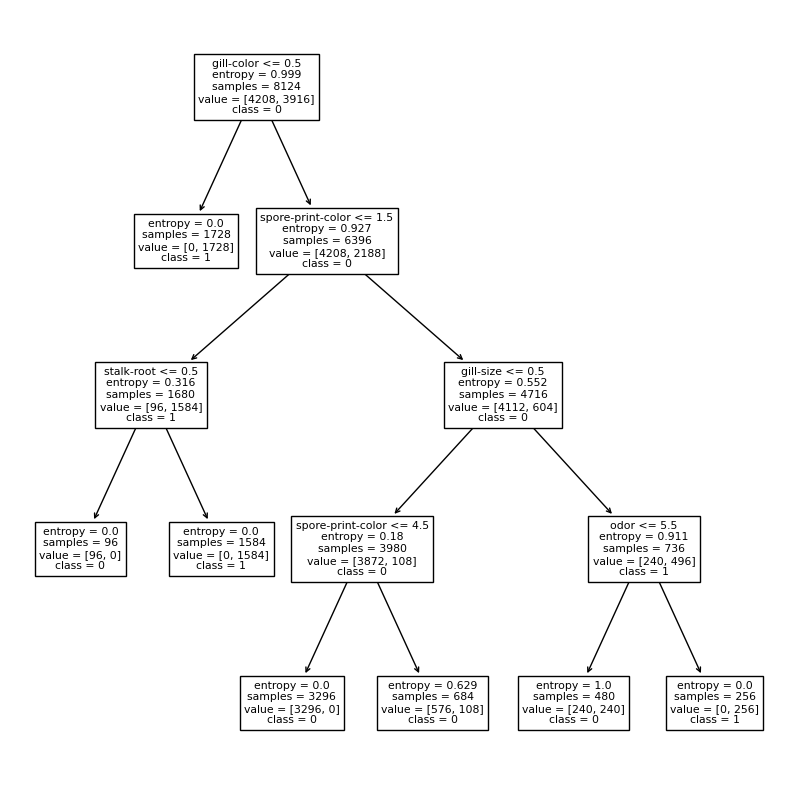

In [20]:
feature_names = [
    "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring",
    "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color",
    "population", "habitat"
]

class_names = [str(class_name) for class_name in clf.classes_]

fig, ax = plt.subplots(figsize=(10, 10))  
tree.plot_tree(clf, ax=ax, feature_names=feature_names, class_names=class_names)
plt.show()

In [21]:
y_pred = clf.predict(X)
y_true = y

conf_matrix = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy:", accuracy)

Confusion Matrix:
[[4208    0]
 [ 348 3568]]
Accuracy: 0.9571639586410635


Decision Tree Using Gini

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4)
clf_gini.fit(X, y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

In [23]:
y_pred_gini = clf_gini.predict(X)
conf_matrix_gini = confusion_matrix(y, y_pred_gini)

accuracy_gini = accuracy_score(y, y_pred_gini)


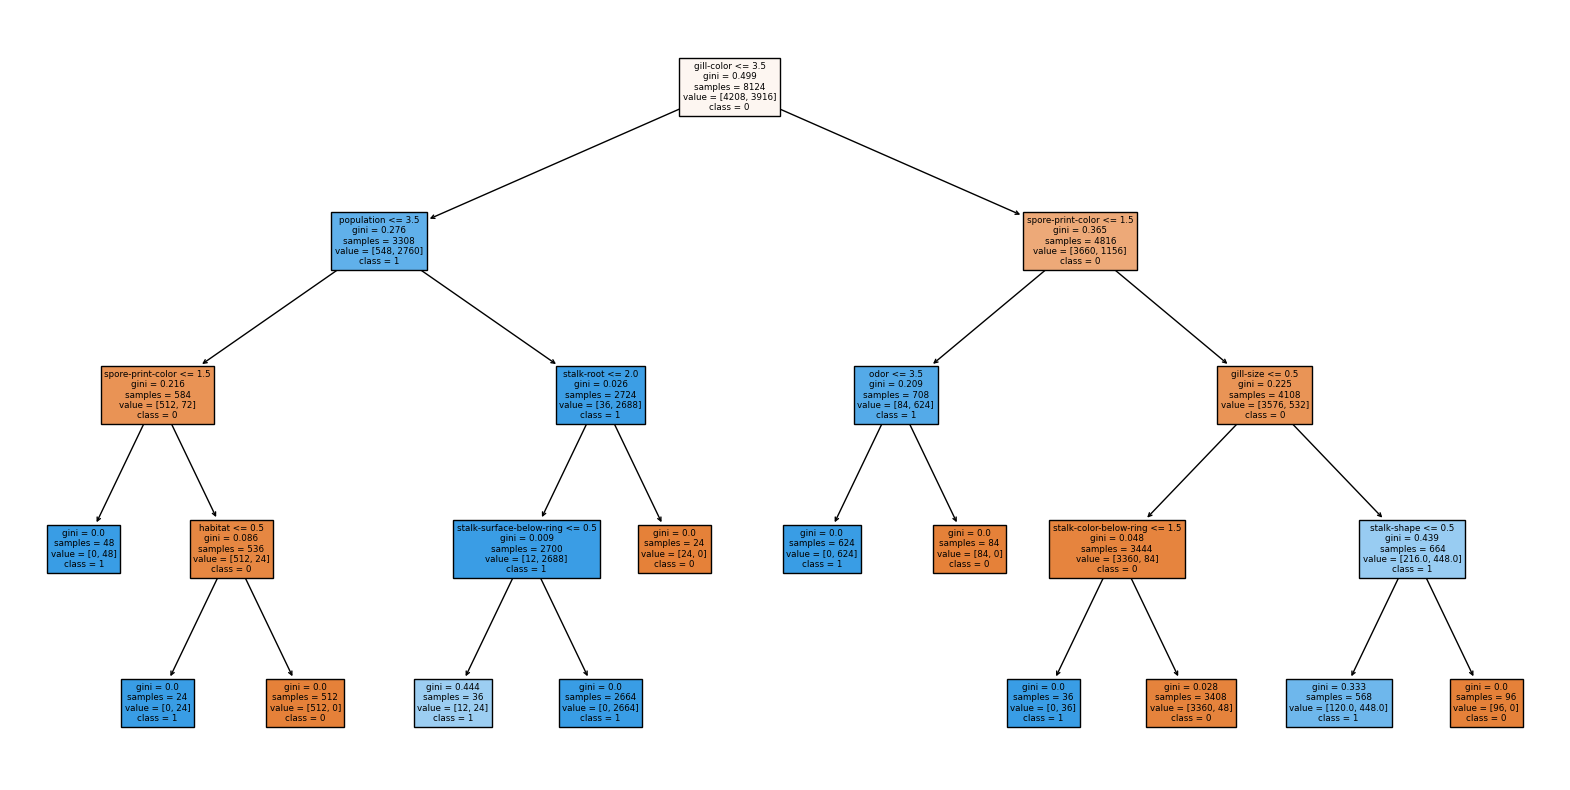

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(clf_gini, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [25]:
print("Confusion Matrix:")
print(conf_matrix_gini)
print("Accuracy:", accuracy_gini)

Confusion Matrix:
[[4076  132]
 [  48 3868]]
Accuracy: 0.9778434268833087
